In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pylab as pl
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense,Dropout, Activation, Flatten
from tensorflow.keras import layers,activations
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
base_dir = "planes"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.1)

In [6]:
train_datagen = train_datagen.flow_from_directory(base_dir,target_size=(500,500),
                                                  subset="training",
                                                  batch_size=16)

test_datagen = test_datagen.flow_from_directory(base_dir,target_size=(500,500),
                                                subset="validation",
                                                batch_size=16)

Found 7575 images belonging to 6 classes.
Found 839 images belonging to 6 classes.


In [7]:
## Test yazarken işe yarıyor :)
print("class_indices : ",train_datagen.class_indices)
print("egitim veri sayısı : ",len(train_datagen.classes))
print("classes : ",train_datagen.classes)
print("egitim veri sayısı : ",train_datagen.samples)
# print("Veri dosya isimleri :",train_datagen.filenames) # ['drone/00000138.jpg', 'drone/00000139.jpg',..
print("interpolasyon türü : ",train_datagen.interpolation)
print("target size : ",train_datagen.target_size)
print("subset : ",train_datagen.subset)
print("Shuffle : ",train_datagen.shuffle)
print("Split oranı : ",train_datagen.split)
print("Transfer lea",train_datagen.sample_weight)

class_indices :  {'drone': 0, 'fighter-jet': 1, 'helicopter': 2, 'missile': 3, 'passenger-plane': 4, 'rocket': 5}
egitim veri sayısı :  7575
classes :  [0 0 0 ... 5 5 5]
egitim veri sayısı :  7575
interpolasyon türü :  nearest
target size :  (500, 500)
subset :  training
Shuffle :  True
Split oranı :  (0.1, 1)
Transfer lea None


In [8]:
classes_name = ["drone", "fighter-jet", "helicopter", "missile", "passenger-plane", "rocket"]

In [9]:
# test_datagen.next() # rastgele data getirir

index no : [0. 0. 0. 1. 0. 0.]
name : missile


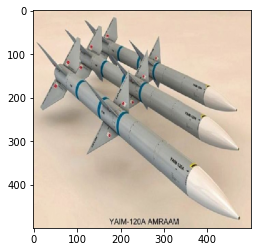

index no : [0. 1. 0. 0. 0. 0.]
name : fighter-jet


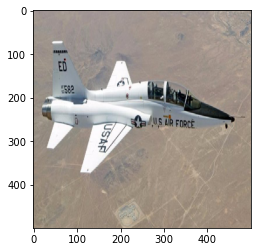

index no : [0. 0. 1. 0. 0. 0.]
name : helicopter


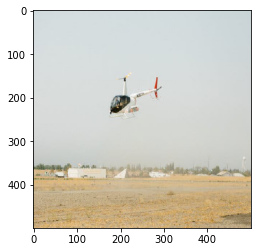

index no : [1. 0. 0. 0. 0. 0.]
name : drone


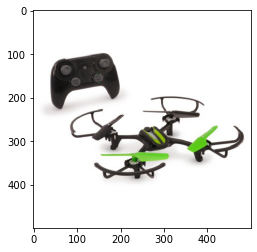

index no : [0. 0. 0. 0. 0. 1.]
name : rocket


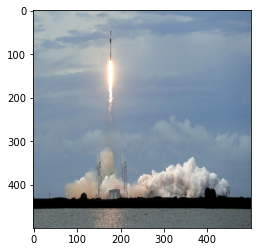

In [10]:
for _ in range(5):
    img,label = test_datagen.next() 
    plt.imshow(img[0])
    print("index no :",label[0])
    print("name :",classes_name[np.argmax(label[0])])
    plt.show()

In [19]:
model = Sequential()

model.add(layer=Conv2D(filters=4,activation="relu",kernel_size=(5,5),input_shape = (500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dense(50,activation="relu")) # 50 nöron gizli katman
model.add(layer=Conv2D(filters=8,activation="relu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dense(100,activation="relu")) # 100 nöron gizli katmanda
model.add(layer=Conv2D(filters=16,activation="relu",kernel_size=(5,5)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dense(50,activation="relu")) # 50 nöron gizli katmanda
model.add(layer=Conv2D(filters=32,activation="relu",kernel_size=(5,5)))
model.add(layers.Flatten())
model.add(layers.Dense(6,activation="softmax")) # sınıf sayısı kadar çıktı alıyoruz
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 248, 248, 4)      0         
 2D)                                                             
                                                                 
 dense_9 (Dense)             (None, 248, 248, 50)      250       
                                                                 
 conv2d_9 (Conv2D)           (None, 244, 244, 8)       10008     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 122, 122, 8)      0         
 2D)                                                             
                                                                 
 dense_10 (Dense)            (None, 122, 122, 100)    

In [ ]:
tf.config.set_soft_device_placement(True)

optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

with tf.device("/gpu:0"):
    model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])
    result = model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5


2022-05-09 08:09:48.879436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - ETA: 0s - loss: 1.7785 - mse: 0.1381 - accuracy: 0.2133

2022-05-09 08:14:46.283482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


474/474 [==============================] - 319s 671ms/step - loss: 1.7785 - mse: 0.1381 - accuracy: 0.2133 - val_loss: 1.7666 - val_mse: 0.1380 - val_accuracy: 0.2193
Epoch 2/5
474/474 [==============================] - 347s 732ms/step - loss: 1.7635 - mse: 0.1373 - accuracy: 0.2329 - val_loss: 1.7248 - val_mse: 0.1356 - val_accuracy: 0.2396
Epoch 3/5
474/474 [==============================] - 345s 728ms/step - loss: 1.7411 - mse: 0.1359 - accuracy: 0.2543 - val_loss: 1.6708 - val_mse: 0.1319 - val_accuracy: 0.3337
Epoch 4/5
474/474 [==============================] - 338s 713ms/step - loss: 1.7269 - mse: 0.1351 - accuracy: 0.2631 - val_loss: 1.6508 - val_mse: 0.1312 - val_accuracy: 0.3302
Epoch 5/5
446/474 [===========================>..] - ETA: 18s - loss: 1.7170 - mse: 0.1344 - accuracy: 0.2684

In [16]:
model.history.history

{'loss': [1.7256312370300293,
  1.62703537940979,
  1.5866880416870117,
  1.556548833847046,
  1.5245698690414429],
 'mse': [0.13503824174404144,
  0.1286013126373291,
  0.12583276629447937,
  0.12355419993400574,
  0.12140053510665894],
 'accuracy': [0.2666666507720947,
  0.34481847286224365,
  0.3720132112503052,
  0.3916831612586975,
  0.4048844873905182],
 'val_loss': [1.5499777793884277,
  1.4478423595428467,
  1.4021642208099365,
  1.447630524635315,
  1.4362765550613403],
 'val_mse': [0.12411457300186157,
  0.11731384694576263,
  0.11352616548538208,
  0.11705627292394638,
  0.11565399914979935],
 'val_accuracy': [0.4147794842720032,
  0.4660309851169586,
  0.4707985520362854,
  0.452920138835907,
  0.46126341819763184]}

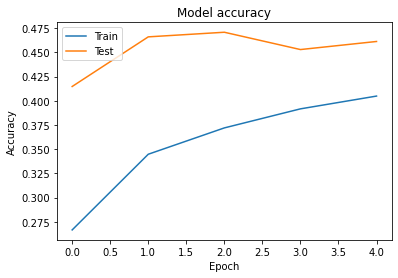

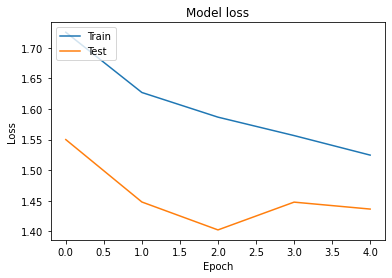

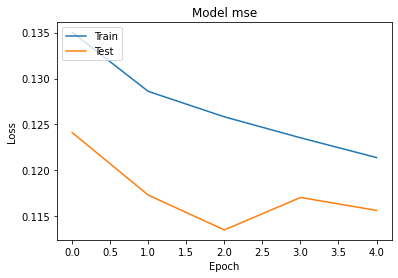

53/53 [==============================] - 22s 413ms/step - loss: 1.4363 - mse: 0.1157 - accuracy: 0.4613
Test loss: 1.4362766742706299
Test accuracy: 0.11565399914979935


In [17]:
#plot accuracy vs epoch
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(model.history.history['mse'])
plt.plot(model.history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_datagen, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

elu
53/53 [==============================] - 22s 413ms/step - loss: 1.4363 - mse: 0.1157 - accuracy: 0.4613
Test loss: 1.4362766742706299
Test accuracy: 0.11565399914979935